In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Bidirectional,TimeDistributed,Conv1D,MaxPooling1D,Flatten,ConvLSTM2D


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)



In [2]:
df_price = pd.read_csv('../input/nyse/prices.csv')
df_price.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
df_price['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [4]:
df_google=df_price[df_price['symbol']=='GOOG'][['close']]
df_google

,close
439,626.751061
907,623.991055
1375,608.261023
1843,594.101005
2311,602.021036
...,...
848963,789.909973
849463,791.549988
849963,785.049988
850463,782.789978


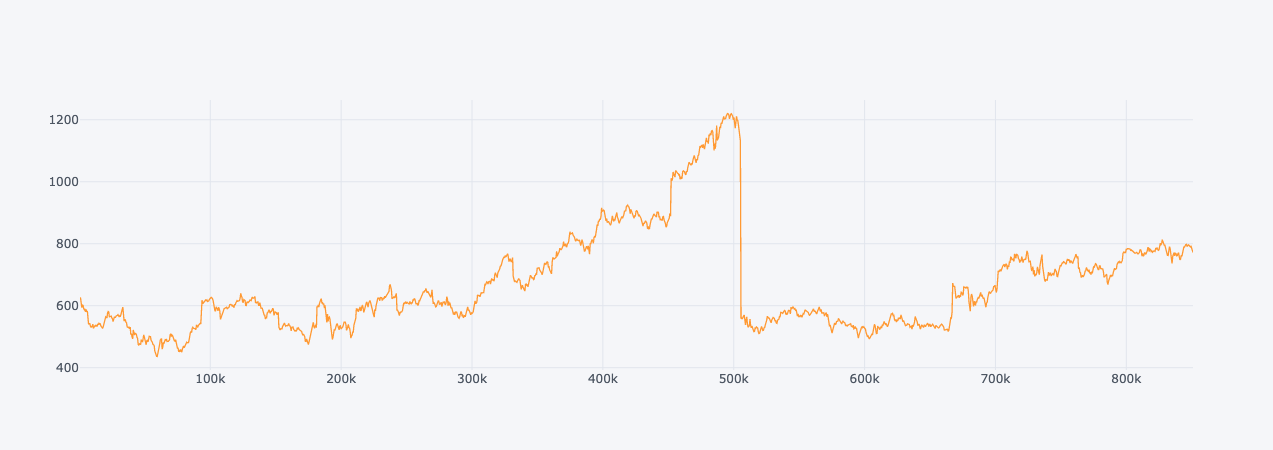

In [5]:
df_google.iplot()

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df_google=scaler.fit_transform(np.array(df_google).reshape(-1,1))

In [7]:
##splitting dataset into train and test split
training_size=int(len(df_google)*0.70)
test_size=len(df_google)-training_size
train_data,test_data=df_google[0:training_size,:],df_google[training_size:len(df_google),:1]

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(1132, 100)
(1132,)


(None, None)

In [11]:
print(X_test.shape), print(ytest.shape)

(428, 100)
(428,)


(None, None)

In [12]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

2021-11-15 08:35:31.301664: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
18/18 [==============================] - 12s 349ms/step - loss: 0.0463 - val_loss: 0.0092
Epoch 2/20
18/18 [==============================] - 5s 277ms/step - loss: 0.0102 - val_loss: 0.0026
Epoch 3/20
18/18 [==============================] - 5s 275ms/step - loss: 0.0061 - val_loss: 0.0015
Epoch 4/20
18/18 [==============================] - 5s 278ms/step - loss: 0.0053 - val_loss: 0.0013
Epoch 5/20
18/18 [==============================] - 5s 276ms/step - loss: 0.0047 - val_loss: 9.1733e-04
Epoch 6/20
18/18 [==============================] - 5s 306ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 7/20
18/18 [==============================] - 5s 272ms/step - loss: 0.0039 - val_loss: 9.0411e-04
Epoch 8/20
18/18 [==============================] - 5s 279ms/step - loss: 0.0033 - val_loss: 9.6168e-04
Epoch 9/20
18/18 [==============================] - 5s 278ms/step - loss: 0.0033 - val_loss: 8.0170e-04
Epoch 10/20
18/18 [==============================] - 5s 273ms/step - loss: 0.0032 -

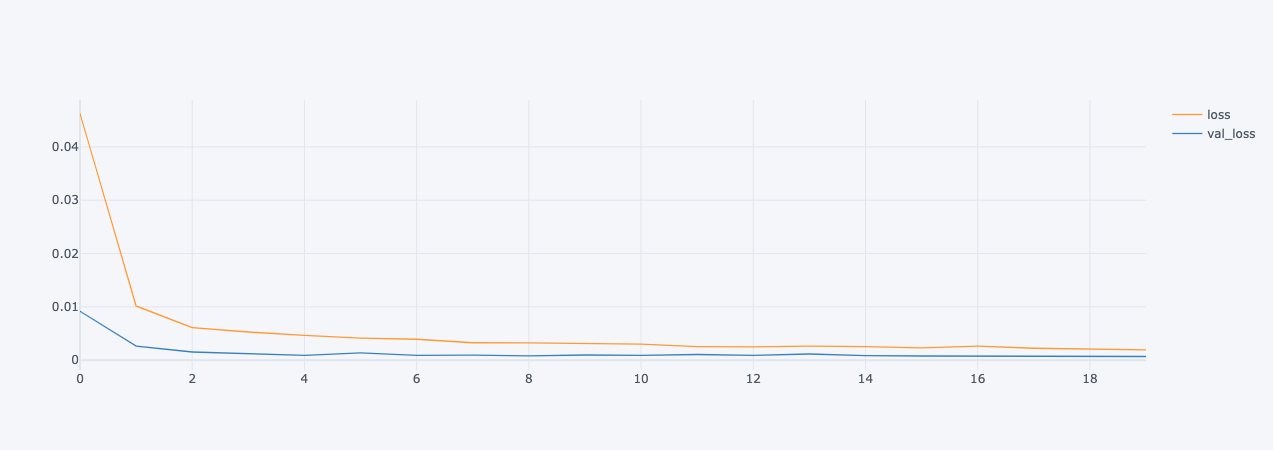

In [16]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.iplot()

In [17]:
### Lets Do the prediction and check performance metrics
train_predict=model1.predict(X_train)
test_predict=model1.predict(X_test)

In [18]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

## Train Data

In [19]:
# Train data
eval_metrics(y_train,train_predict)

r2_score: 0.9663047071536957 
 mae: 0.023874566403818687 
 mse: 0.0018524179043755665 
 rmse: 0.04303972472467228


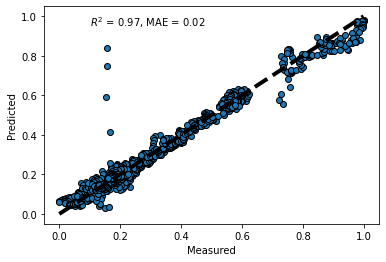

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_train,train_predict, edgecolors = (0, 0, 0))
ax.text(0.1,0.95, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(y_train,train_predict), mean_absolute_error(y_train,train_predict)))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Test Data

In [22]:
# Test data

eval_metrics(ytest,test_predict)

r2_score: 0.9351414772651053 
 mae: 0.01850256962085337 
 mse: 0.0006910162904472771 
 rmse: 0.026287188713273946


In [23]:
X_test.shape

(428, 100, 1)

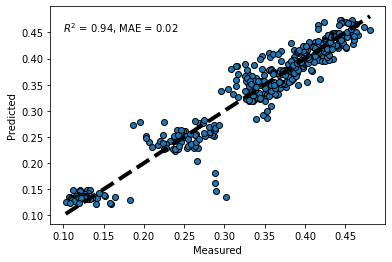

In [24]:
fig, ax = plt.subplots()
ax.scatter(ytest,test_predict, edgecolors = (0, 0, 0))
ax.text(0.1,0.45, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest,test_predict), mean_absolute_error(ytest,test_predict)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [25]:
##Transformback to original form
train_predict_inv=scaler.inverse_transform(train_predict)
test_predict_inv=scaler.inverse_transform(test_predict)
y_test_inv= scaler.inverse_transform(ytest.reshape(-1,1))

In [26]:
# Train data
eval_metrics(y_test_inv,test_predict_inv)

r2_score: 0.9351414754690324 
 mae: 14.50788939210353 
 mse: 424.8470607077015 
 rmse: 20.611818471636642


## **Bidirectional LSTM**

In [27]:
n_steps = 100
n_features=1

model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# fit model
model2.fit(X_train, y_train, epochs=20, validation_data=(X_test,ytest),verbose=1)

Epoch 1/20
36/36 [==============================] - 8s 130ms/step - loss: 0.0535 - val_loss: 0.0031
Epoch 2/20
36/36 [==============================] - 4s 120ms/step - loss: 0.0190 - val_loss: 0.0023
Epoch 3/20
36/36 [==============================] - 5s 132ms/step - loss: 0.0098 - val_loss: 0.0015
Epoch 4/20
36/36 [==============================] - 4s 121ms/step - loss: 0.0053 - val_loss: 9.4948e-04
Epoch 5/20
36/36 [==============================] - 4s 118ms/step - loss: 0.0026 - val_loss: 8.1111e-04
Epoch 6/20
36/36 [==============================] - 4s 121ms/step - loss: 0.0024 - val_loss: 8.3193e-04
Epoch 7/20
36/36 [==============================] - 4s 118ms/step - loss: 0.0022 - val_loss: 9.5908e-04
Epoch 8/20
36/36 [==============================] - 4s 118ms/step - loss: 0.0022 - val_loss: 8.8297e-04
Epoch 9/20
36/36 [==============================] - 4s 125ms/step - loss: 0.0021 - val_loss: 7.4665e-04
Epoch 10/20
36/36 [==============================] - 5s 131ms/step - loss: 0

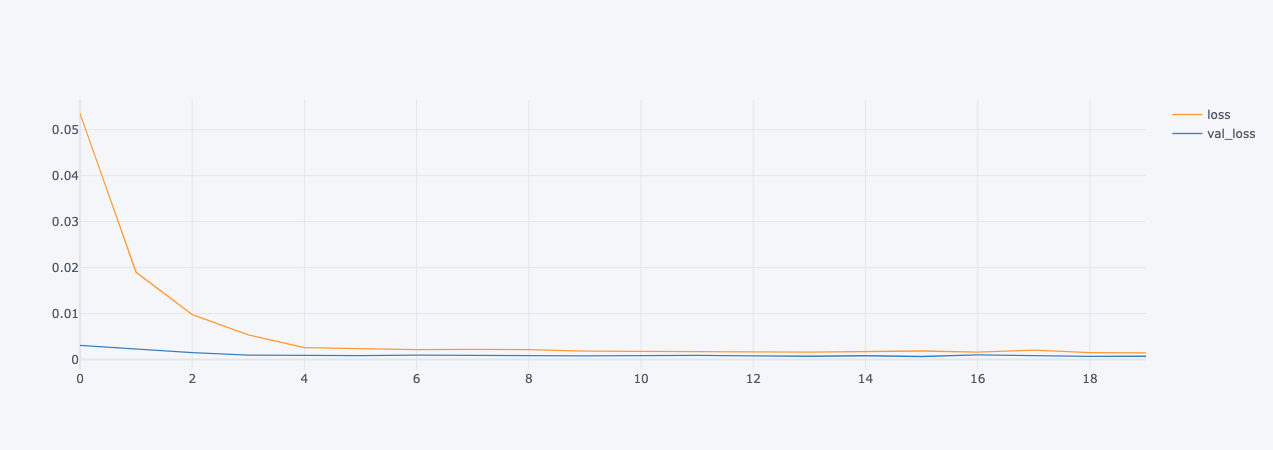

In [28]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.iplot()

In [29]:
### Lets Do the prediction and check performance metrics
train_predict2=model2.predict(X_train)
test_predict2=model2.predict(X_test)

### Train Data with Bidirectional LSTM

In [30]:
# Train data

eval_metrics(y_train,train_predict2)

r2_score: 0.9740303730085765 
 mae: 0.02201449325817203 
 mse: 0.0014276950263735124 
 rmse: 0.03778485181092434


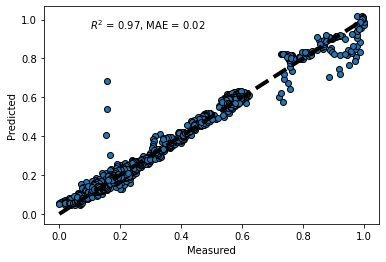

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_train,train_predict2, edgecolors = (0, 0, 0))
ax.text(0.1,0.95, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(y_train,train_predict2), mean_absolute_error(y_train,train_predict2)))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

### Test Data with Bidirectional LSTM

In [32]:
# Test data

eval_metrics(ytest,test_predict2)

r2_score: 0.9329754861334467 
 mae: 0.019208452098080718 
 mse: 0.0007140932137848348 
 rmse: 0.02672252259396247


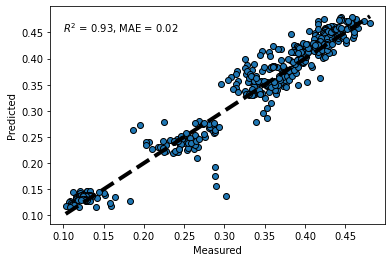

In [33]:
fig, ax = plt.subplots()
ax.scatter(ytest,test_predict2, edgecolors = (0, 0, 0))
ax.text(0.1,0.45, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest,test_predict2), mean_absolute_error(ytest,test_predict2)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

## **CNN LSTM**

In [34]:
n_steps = 100
n_features=1
n_seq = 1

X_train1, y_train1 = create_dataset(train_data, time_step)
X_test1, ytest1 = create_dataset(test_data, time_step)

X_train1 =X_train1.reshape(X_train1.shape[0],n_seq, n_steps, n_features)
X_test1 = X_test.reshape(X_test1.shape[0],n_seq, n_steps, n_features)



In [35]:
# define model
n_steps = 100
n_features=1
n_seq = 1


model3 = Sequential()
model3.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None,100, 1)))
model3.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model3.add(TimeDistributed(Flatten()))
model3.add(LSTM(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

model3.fit(X_train1, y_train, epochs=50, validation_data=(X_test1,ytest),verbose=1)

Epoch 1/50
36/36 [==============================] - 2s 19ms/step - loss: 0.0233 - val_loss: 0.0017
Epoch 2/50
36/36 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0012
Epoch 3/50
36/36 [==============================] - 0s 9ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 4/50
36/36 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 5/50
36/36 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 9.5194e-04
Epoch 6/50
36/36 [==============================] - 0s 9ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 7/50
36/36 [==============================] - 0s 9ms/step - loss: 0.0026 - val_loss: 7.9523e-04
Epoch 8/50
36/36 [==============================] - 0s 9ms/step - loss: 0.0026 - val_loss: 8.5211e-04
Epoch 9/50
36/36 [==============================] - 0s 9ms/step - loss: 0.0023 - val_loss: 8.1783e-04
Epoch 10/50
36/36 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 8.2570e-

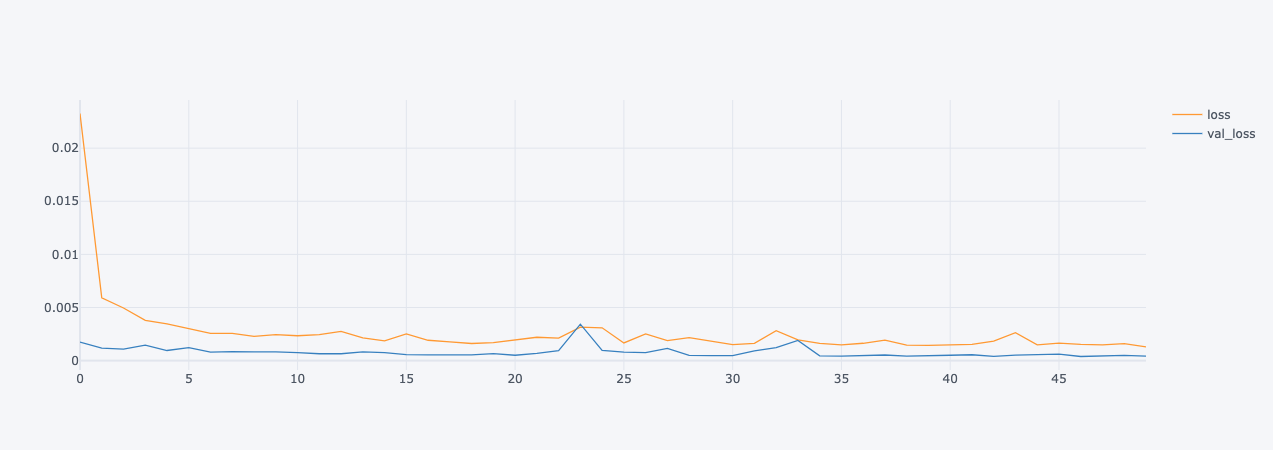

In [36]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.iplot()

In [37]:
### Lets Do the prediction and check performance metrics
train_predict3=model3.predict(X_train1)
test_predict3=model3.predict(X_test1)

### Train Data with CNN LSTM (TimeDistributed(Conv1D))

In [38]:
# Train data

eval_metrics(y_train1,train_predict3)

r2_score: 0.9783874020868598 
 mae: 0.01666606700829149 
 mse: 0.0011881648726718792 
 rmse: 0.034469767516939816


In [ ]:
X_train1.shape

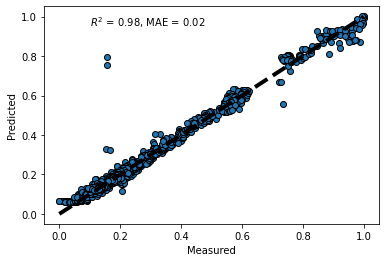

In [39]:
fig, ax = plt.subplots()
ax.scatter(y_train1,train_predict3, edgecolors = (0, 0, 0))
ax.text(0.1,0.95, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(y_train1,train_predict3), mean_absolute_error(y_train1,train_predict3)))
ax.plot([y_train1.min(), y_train1.max()], [y_train1.min(), y_train1.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

### Test Data with CNN LSTM (TimeDistributed(Conv1D))

In [40]:
# Train data

eval_metrics(ytest1,test_predict3)

r2_score: 0.96093447641292 
 mae: 0.014071641290518805 
 mse: 0.0004162122733486354 
 rmse: 0.020401281169295113


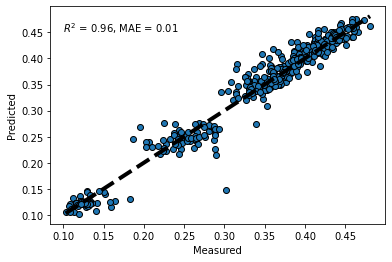

In [41]:
fig, ax = plt.subplots()
ax.scatter(ytest1,test_predict3, edgecolors = (0, 0, 0))
ax.text(0.1,0.45, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest1,test_predict3), mean_absolute_error(ytest1,test_predict3)))
ax.plot([ytest1.min(), ytest1.max()], [ytest1.min(), ytest1.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

## **CNN LSTM (ConvLSTM2D)**

In [42]:
n_steps = 100
n_features=1
n_seq = 1

X_train2, y_train2 = create_dataset(train_data, time_step)
X_test2, ytest2 = create_dataset(test_data, time_step)

X_train2 =X_train2.reshape(X_train2.shape[0],n_seq,1, n_steps, n_features)
X_test2 = X_test2.reshape(X_test2.shape[0],n_seq, 1,n_steps, n_features)


In [43]:
# define model

model4 = Sequential()
model4.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model4.add(Flatten())
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')
# fit model
model4.fit(X_train2, y_train2, epochs=50, validation_data=(X_test2,ytest2),verbose=1)

Epoch 1/50
36/36 [==============================] - 4s 34ms/step - loss: 0.0439 - val_loss: 0.0047
Epoch 2/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0160 - val_loss: 0.0016
Epoch 3/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0104 - val_loss: 0.0016
Epoch 4/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0073 - val_loss: 0.0012
Epoch 5/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0059 - val_loss: 0.0011
Epoch 6/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0049 - val_loss: 0.0010
Epoch 7/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0043 - val_loss: 0.0010
Epoch 8/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0039 - val_loss: 9.6353e-04
Epoch 9/50
36/36 [==============================] - 1s 27ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 10/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0035 - val_loss: 7.0821e-04
E

In [44]:
### Lets Do the prediction and check performance metrics
train_predict4=model4.predict(X_train2)
test_predict4=model4.predict(X_test2)

### Train Data with CNN LSTM (ConvLSTM2D)

In [45]:
# Train data

eval_metrics(y_train2,train_predict4)

r2_score: 0.9801577099103544 
 mae: 0.016040582115256906 
 mse: 0.0010908411923745776 
 rmse: 0.03302788507268634


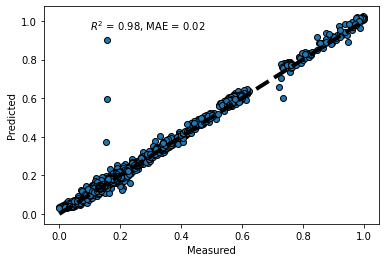

In [46]:
fig, ax = plt.subplots()
ax.scatter( y_train2,train_predict4, edgecolors = (0, 0, 0))
ax.text(0.1,0.95, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(y_train2,train_predict4), mean_absolute_error(y_train2,train_predict4)))
ax.plot([y_train2.min(), y_train2.max()], [y_train2.min(), y_train2.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

### Test Data with CNN LSTM (ConvLSTM2D)

In [47]:
# Train data

eval_metrics(ytest2,test_predict4)

r2_score: 0.9551538959063453 
 mae: 0.01624678937282794 
 mse: 0.0004777997892193289 
 rmse: 0.021858631915546062


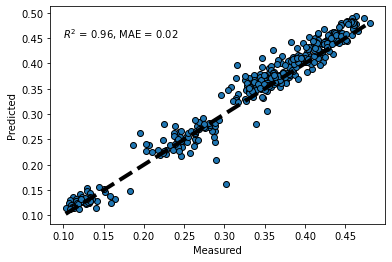

In [49]:
fig, ax = plt.subplots()
ax.scatter( ytest2, test_predict4, edgecolors = (0, 0, 0))
ax.text(0.1,0.45, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest2, test_predict4), mean_absolute_error(ytest2, test_predict4)))
ax.plot([ytest2.min(), ytest2.max()], [ytest2.min(), ytest2.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()